Word is here : https://aristotleuniversity-my.sharepoint.com/:w:/g/personal/evangepc_office365_auth_gr/EX_IdIpQqSZLk8HexlrctRoBtt2TgEonNvY6EFAd1cB5TA?e=JfXmTE

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import datasets

import time
import numpy as np

from sklearn import svm
from sklearn import neighbors
from sklearn import metrics

Load the dataset mnist from keras datasets library

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

Recreate the dataset 

In [3]:
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

for i in range (60000):
    if y_train[i]%2 == 0 :
        y_train[i] = -1
    else:
        y_train[i] = 1
    if i<10000:
        if y_test[i]%2 == 0 :
            y_test[i] = -1
        else:
            y_test[i] = 1

Visualise the data

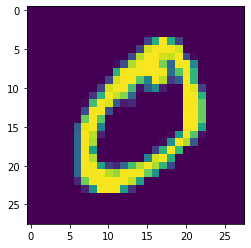

In [4]:
plt.imshow(x_train[1])
plt.show()

Normalize the data

In [5]:
x_train.shape
x_train = tf.reshape(x_train/255, [60000,-1])
x_test =  tf.reshape(x_test/255, [10000,-1])
x_test.shape

TensorShape([10000, 784])

Run KNeighborsClassifier from sklearn library

K = 1

In [6]:
clf = neighbors.KNeighborsClassifier(1).fit(x_train,  y_train)
y_pred = clf.predict(x_test)  #Predict the class labels for the provided data.
metrics.accuracy_score(y_test, y_pred)

0.9838

K = 3

In [7]:
clf = neighbors.KNeighborsClassifier(3).fit(x_train,  y_train)
y_pred = clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9852

In [9]:
start = time.time()
clf = svm.SVC(C = 1.5, kernel='poly', degree=4 ,gamma='scale',cache_size=1000, verbose=True)
clf.fit(x_train, y_train)
end = time.time()
str(end - start)+" s"

[LibSVM]

'187.18227529525757 s'

In [10]:
start = time.time()
y_pred = clf.predict(x_test)
end = time.time()
str(end - start)+" s"

'22.355586051940918 s'

In [11]:
metrics.accuracy_score(y_test, y_pred)

0.985

In [12]:
metrics.precision_score(y_test, y_pred)

0.9823667711598746

In [13]:
metrics.recall_score(y_test, y_pred)

0.9881750098541584